In [1]:
1
%load_ext autoreload
%autoreload 2

import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import sklearn.metrics
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras

import dolon.utils as utils
from io import StringIO


%reload_ext autoreload



In [2]:
import os
os.environ["POSTGRES_PASSWORD"] = "postgres123"
os.environ["POSTGRES_USER"] = "postgres"
os.environ["POSTGRES_DB"] = "mnemic"
os.environ["HOST"] = "127.0.0.1"


In [3]:
def show_correlation_graph(data, title=None,
                           cmap=None, linewidths=0, figsize=(9, 6), annot=True):
    if cmap is None:
        cmap = sns.diverging_palette(10, 120, as_cmap=True)
    data = data.dropna()
    corr = data.corr()
    for column_name in corr.columns:
        corr[column_name] = corr[column_name].abs()
    _, ax = plt.subplots(figsize=figsize)
    if title:
        ax.set_title(title)

    _ = sns.heatmap(corr, annot=annot, fmt="2.2f",
                linewidths=linewidths, ax=ax, cmap=cmap)


Closing connection


,time,mem_allocation,active_tasks,live_msgs,idle,dn_conn
0,2021-05-20 19:43:37,67.149506,7.0,432593.0,8.0,9.0
1,2021-05-20 19:43:39,67.183525,7.0,432601.0,8.0,9.0
2,2021-05-20 19:43:41,67.183296,7.0,432609.0,8.0,9.0
3,2021-05-20 19:43:43,67.183319,7.0,432617.0,8.0,9.0
4,2021-05-20 19:43:45,67.184280,7.0,432625.0,8.0,9.0
...,...,...,...,...,...,...
369,2021-05-20 19:56:23,67.245857,7.0,435303.0,5.0,6.0
370,2021-05-20 19:56:25,67.246239,7.0,435311.0,5.0,6.0
371,2021-05-20 19:56:27,67.245995,7.0,435319.0,5.0,6.0
372,2021-05-20 19:56:29,67.243866,7.0,435327.0,5.0,6.0


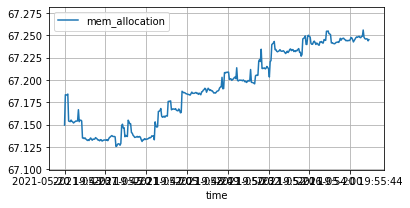

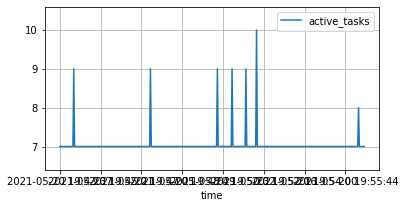

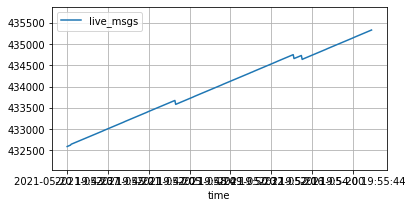

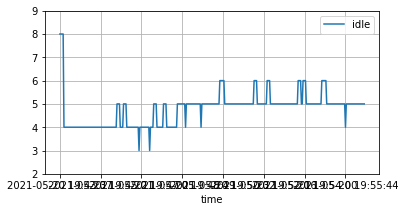

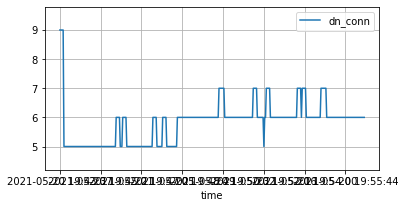

In [205]:
data = await utils.get_latest_trace('pavarotti-new1')
df = pd.read_csv(StringIO(data))
for column_name in df.columns:
    if column_name == 'time':
        continue
    min_value = min(df[column_name])
    max_value = max(df[column_name])
    df.plot.line(x="time", y=column_name, rot=0, grid=True, figsize=(6,3))
    
    if max_value > min_value:
        height = max_value - min_value
        plt.ylim([min_value - height * 0.2, max_value + height * 0.2])
    elif max_value < min_value:
        max_value, min_value = min_value, max_value
        height = max_value - min_value
        plt.ylim([min_value - height * 0.2, max_value + height * 0.2])
    else:
        height = 0.2
        plt.ylim([min_value - height * 0.2, max_value + height * 0.2])
df

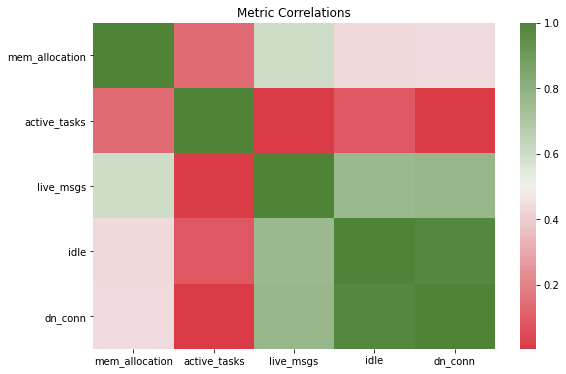

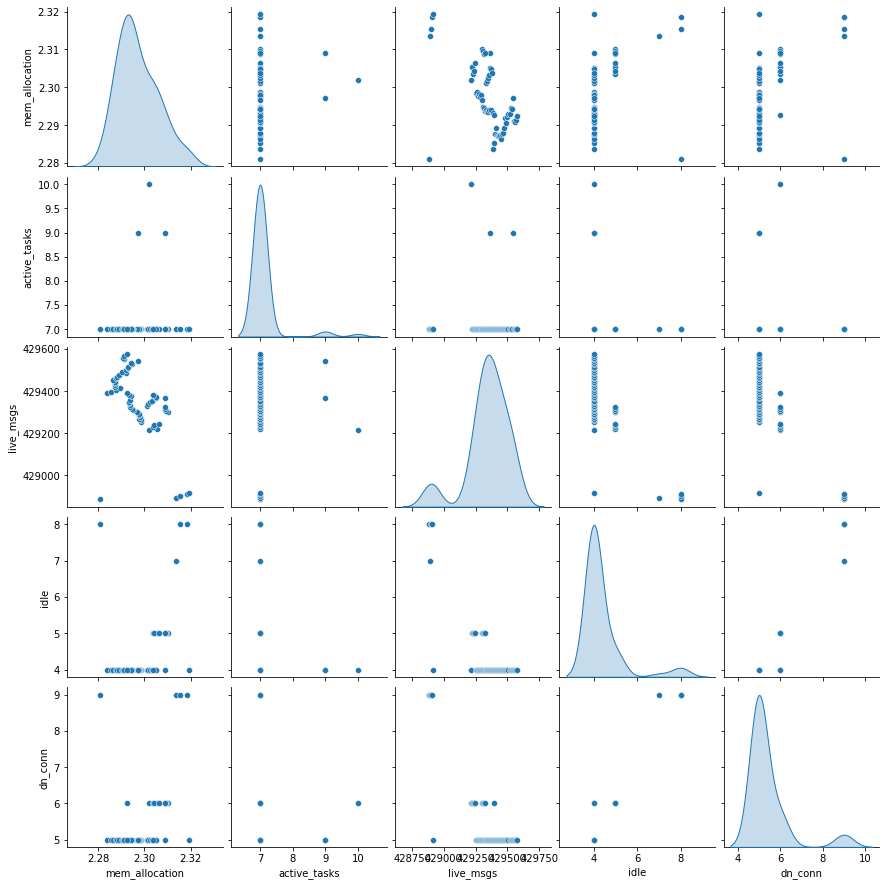

In [190]:
show_correlation_graph(df, annot=False, title="Metric Correlations")
sns.pairplot(df, diag_kind='kde')
